# Day 0 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
sys.path.append("../../lxmls-toolkit/")
import matplotlib.pyplot as plt

# Introduction to gradient descent

We will start motivating the use of the gradient of a function. Then we will see in detail how to compute a numerical approximation of the gradient of a function at a given point. This numerical approximation ** should only be used to check whether our exact gradient computation was correct or not**. Why? Essentially for performance reasons. When approximating numerically the gradient of a function at a given point we need to evaluate the function in two points and divide by a scalar. This essentially means that we will double the amount of time needed to compute the gradient. If evaluating a function (such as a neural net) requires a non trivial amount of computation doing the approximation might be a terrible idea. 


#### Overview of gradient descent/ascent

Gradient descent is an optimization method used to find a local minimum or maximum of a differentiable function $f$. The method takes an initial initial point $p^0$ (guess of the solution) and then takes a step in the direction given by the gradient of $f$ in $p^0$, $\nabla f (p^0)$.

The step has a certain length $\eta$.  From this new point $p^1 := p^0 + \eta \nabla f (p^0) $ another evaluation of the gradient is done in order to find a new direction and a new point $p^2$. The process is repeated until  $\|f(p^k) - f(p^{k+1})\| \leq\epsilon$ for a certain $k$ and $\epsilon$. That is until the difference of the  evaluation of a point and the following one is less than a pre specified threshold $\epsilon$.

Notice that the gradient of a function at a given point gives the direction of maximum growth of the function at that point. Therefore minus the  gradient gives the direction of maximum decrease.
Based on the previous comments the update of a point $p^k$ to $p^{k+1}$, for any $k$, is 

- $p^{k+1} = p^k + \eta \nabla f (p^k) $   if the goal of the algorithm is to find a local maximum of $f$.


- $p^{k+1} = p^k - \eta \nabla f (p^k) $   if the goal of the algorithm is to find a local minimum of $f$.


# Computing numerical approximation of derivatives

Before we implement the numerical approximation of a gradient it might be helpful to implement the numerical computation of a simple derivative.


Let's suppose that we have a function $f$ that takes as input a real number and outputs a real number, $f: \Re \rightarrow \Re$. For example: 

$$f(x) = x^2$$

When solving an minimization problem our objective will be to find the argument $x$ that minimizes this function. Notice that for maximization, the same theory can be applied to the function $-f(x)$ insted to $f(x)$. In oreder to solve this minimization problem we need the concept of **derivative**.

#### Derivative of a function at a given point 
The derivative of $f$ of a variable $x$, denoted by $f'(x)$ or $\frac{\mathrm{d}f}{\mathrm{d}x}$,  is a measure of the rate at which the value of the function changes with respect to the change of the variable. It is defined as the following limit:

$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

The derivative specifies how to scale a small change in the input in order to obtain the corresponding change in the output: 

$$ f(x + h) \approx f(x) + h f'(x)$$

The limit as $h$ approaches zero it represents the **slope of the tangent line** to $(x, f(x))$ (if it exists). That means that for any value of $h$ that is not zero the result of the formula is only an approximation.

#### Visualizing the  difference between the true derivative at a point and the approximation

In [2]:
# This is the function that we will investigate:
def func(x):
    return x**2

# This is the point where we choose to take the gradient: [-1, 1]
x = -1.0
x_fx = [x, func(x)]
print("Point (x, f(x)): {}".format(x_fx))

# we know that the true gradient is f'(x)=2*x
def true_gradient(x):
    return 2*x

true_grad = true_gradient(x)  # 2.0
print("True grad: {}".format(true_grad))

Point (x, f(x)): [-1.0, 1.0]
True grad: -2.0


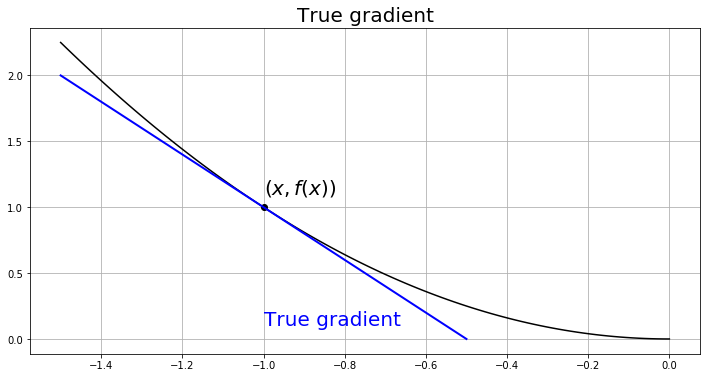

In [3]:
# Now let's plot the true gradient.

def plot_true_gradient():
    # we plot a line along a series of points x
    # linspace gives us 100 points between -1.5 and 0.0
    x_values = np.linspace(-1.5, 0.0, 100)

    # this plots our function f(x)
    plt.plot(x_values, func(x_values), 'k-')

    # this is our point of interest
    plt.plot([x],[func(x)],'ko')
    plt.text(-1.0, 1.1, '$(x,f(x))$', size=20, color="k")

    # this plots the true gradient:
    # we plot a line between two points around x
    # and we use the true gradient to get a y value for them, using:
    # y = func(x) + true_grad * step
    h = 0.5
    plt.plot([x - h, x + h],[func(x) - true_grad * h, func(x) + true_grad * h], 'b-', lw=2)
    plt.text(-1, 0.1, 'True gradient', size=20, color="b")

    plt.gcf().set_size_inches((12,6))
    plt.title("True gradient", size=20)
    plt.grid()
    
plot_true_gradient()
plt.show()

In [4]:
# we can approximate the gradient by taking a small step h.
# for demonstration, we take a pretty large step!
h = 0.5
approx_grad = (func(x + h) - func(x)) / h
print("Approximate grad: {}".format(approx_grad))

Approximate grad: -1.5


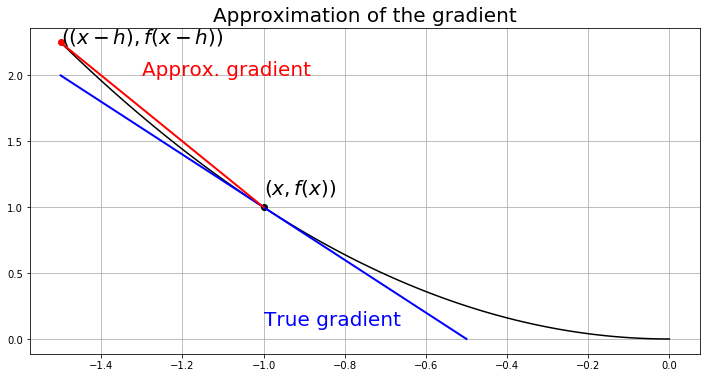

In [5]:
# Now let's plot the approximate gradient too.

def plot_approx_gradient():

    plot_true_gradient()

    # this is the point with which we approximate the gradient
    h = 0.5
    plt.plot([x - h],[func(x - h)],'ro')
    plt.text(x - h, func(x - h), '$((x-h),f(x-h))$', size=20, color="k")
    plt.plot([x - h, x], [func(x - h), func(x)],'r-',lw=2)

    plt.text(-1.3, 2.0, 'Approx. gradient', size=20, color="r")
    plt.title("Approximation of the gradient", size=20)
    
plot_approx_gradient()
plt.show()

### A more general gradient checking example

In [6]:
def function(x):
    return x**2

def grad(x):
    return 2*x

def num_grad(function, x, h = 0.0001):
    return (function(x + h) - function(x))/h

def check_grad(grad, numerical_grad, epsilon=0.0001):
    if np.linalg.norm(grad - numerical_grad) <= epsilon:
        print("grad seems well implemented")
    else:
        print("grad seems wrong!")
        
point = 10
g = grad(point)
print("exact gradient evaluated at {} takes value {}".format(point, g))

num_g = num_grad(function, point)
print("numerical gradient evaluated at {} takes value {}".format(point, num_g))

check_grad(grad(point), num_grad(function, point))

exact gradient evaluated at 10 takes value 20
numerical gradient evaluated at 10 takes value 20.0000999999
grad seems well implemented


# Computing numerical approximation of gradients

#### Toy example of gradient checking

- Let us consider $f(x) = x_1^2 + 10  x_2 + 10 $
- Compute the gradient of f
- Evaluate the gradient of f 
- Check that the true gradient is close to the numerical gradient in several points

In [7]:
def f(x):
    return x[0]**2 + 10*x[1]  + 10

def grad_f(x):
    return [2**x[0], 10]

import scipy
from scipy import optimize
point = np.array([2,3])

print("gradient of f in point is", grad_f(point))
print("distance between numerical and real gradient is ", scipy.optimize.check_grad(f, grad_f, point))

('gradient of f in point is', [4, 10])
('distance between numerical and real gradient is ', 0.0)


#### Toy example gradient checking function with parameters

In [8]:
import scipy
from scipy import optimize

In [9]:
def func(x,params=10):
    return x[0]**2 - 0.5 * x[1]**3 *params

def grad(x,params=10):
    return [2 * x[0], -1.5 * x[1]**2*params]

In [10]:
scipy.optimize.check_grad(func, grad, [1.5, -1.5])

2.384185791015625e-07

In [11]:
def grad_f(x):
    return [2**x[0], 10]

In [12]:
scipy.optimize.check_grad(f, grad_f, np.array([2,3]))

0.0